<a href="https://colab.research.google.com/github/Rinkusoni2910/KNN_SCRATCH_IMPLEMENTATION/blob/main/KNN_SCRATCH_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task - KNN from Scratch

Dataset - diamonds.csv

#About Dataset
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

#Objective 
Objective of this project is to predict the diamond price.💎
by using KNN code ehich is implemented from scratch and then compare this o/p with sklearn knn implementation o/p

#steps to be followed:
Step - 1: Load the data

Step - 2: Perform the EDA on the given dataset

Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)

Step - 4: Normalize the data

Step - 5: Split the data - Test and Train (recommended 75:25 split)

Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN.

Step - 7: Evaluate your model

Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('/content/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Check size of dataset

In [4]:
df.shape

(53940, 10)

#Check the Columns of dataset

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#Check Unique values

In [6]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

#Check for Null values

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

we see that there are no null values in the dataset

#Check the datatypes of the attributes

In [8]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#Summarize or Describe entire dataset

In [9]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#UNIVARIATE ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef9d5826d0>,
      dtype=object)

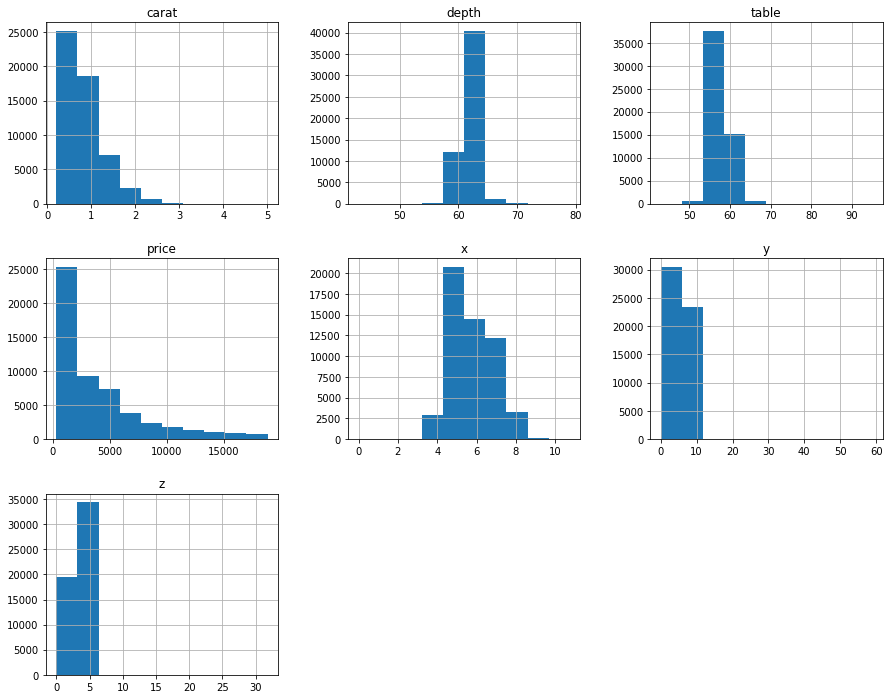

In [11]:
df.hist(figsize=(15,12))

#Box Plot for numerical attributes to understand outliers

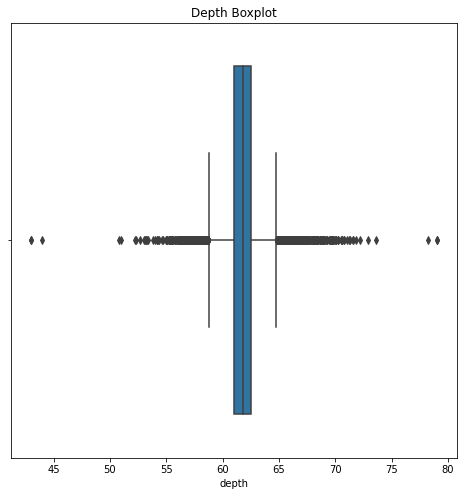

In [12]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.depth)
plt.title('Depth Boxplot')
plt.show()

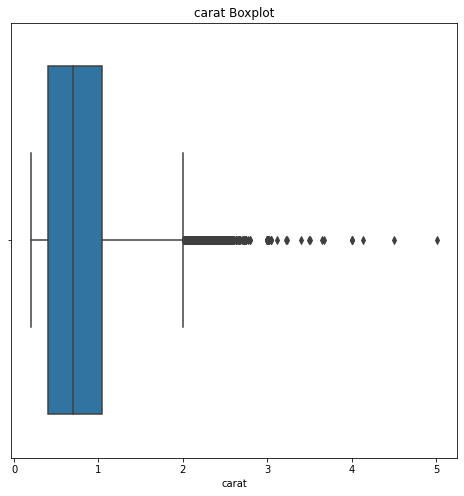

In [13]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.carat)
plt.title('carat Boxplot')
plt.show()

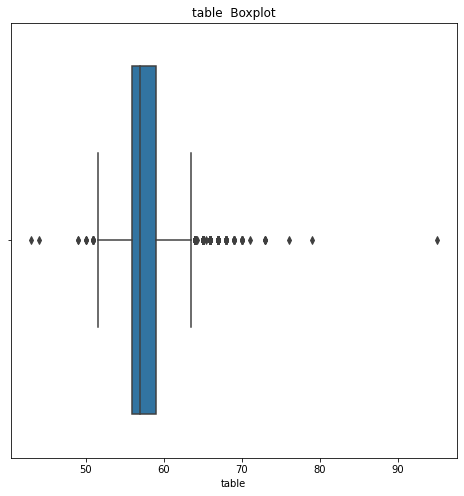

In [14]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.table)
plt.title('table  Boxplot')
plt.show()

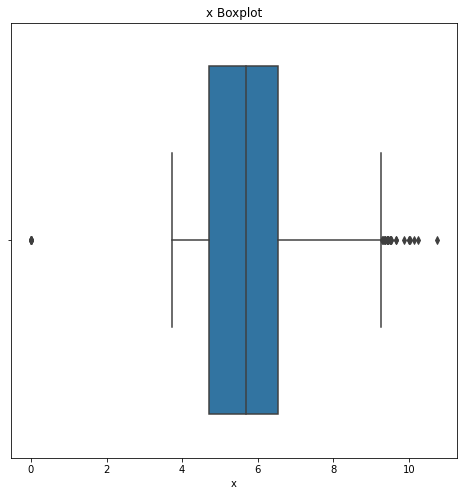

In [15]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.x)
plt.title('x Boxplot')
plt.show()

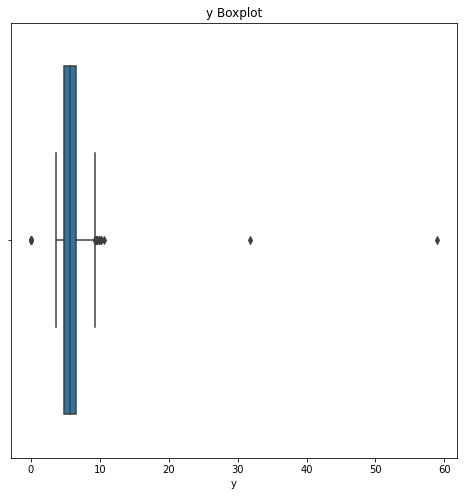

In [16]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.y)
plt.title('y Boxplot')
plt.show()

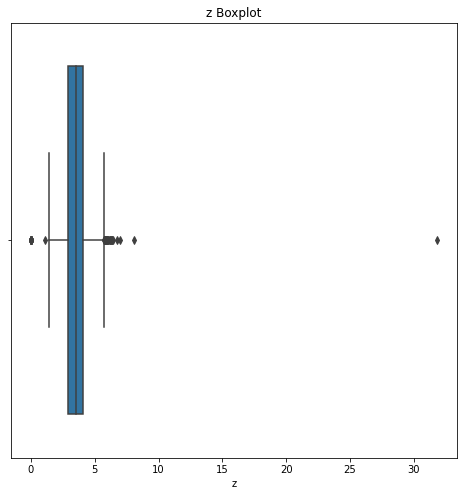

In [17]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.z)
plt.title('z Boxplot')
plt.show()

#Box Plot for categorical variables
#Diamond Cut vs Price


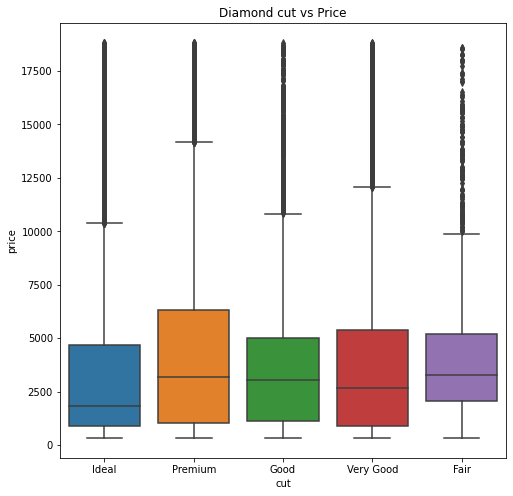

In [18]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.cut)
plt.title("Diamond cut vs Price")
plt.show()

#Diamond color vs Price

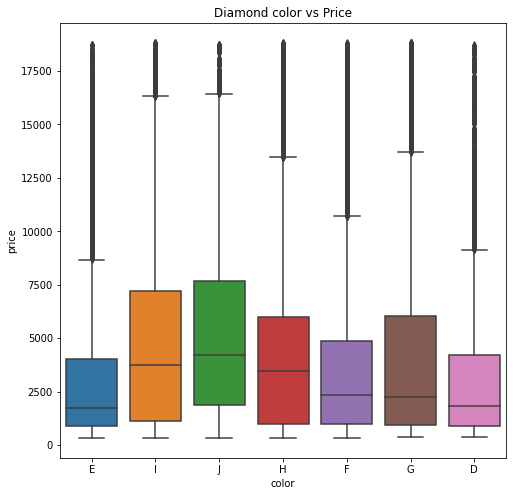

In [19]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.color)
plt.title("Diamond color vs Price")
plt.show()

#Diamond clarity vs Price

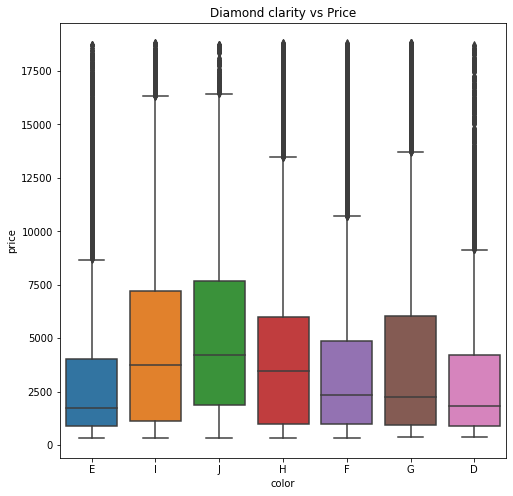

In [20]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.color)
plt.title("Diamond clarity vs Price")
plt.show()

#Correlation Plot

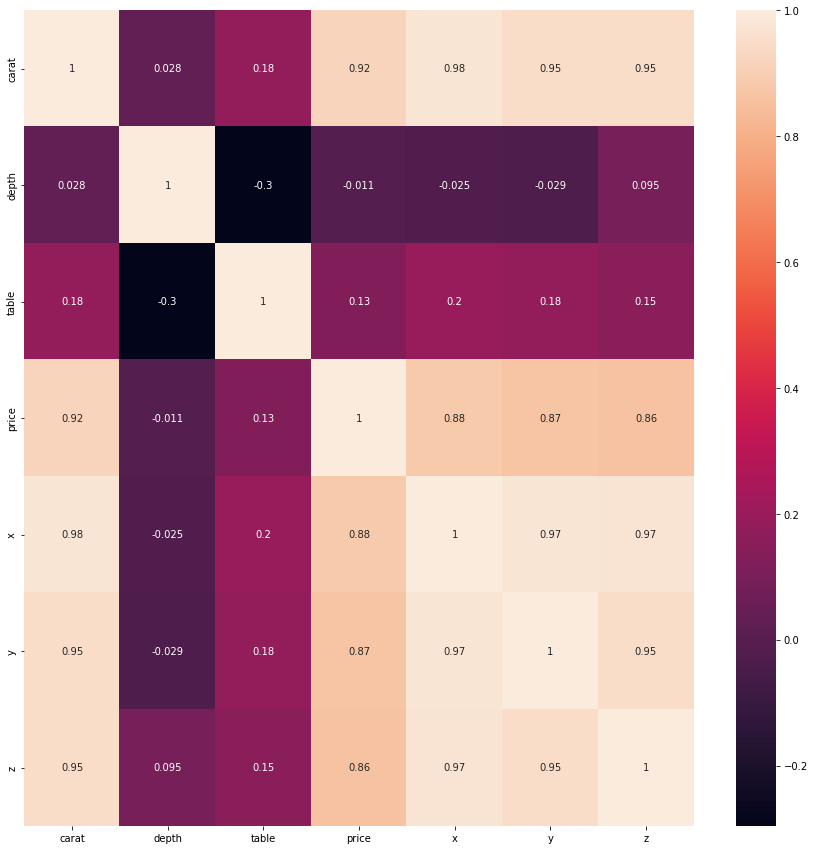

In [21]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

#Observation :
We can observe that the Price of the Diamond is highly correlated to Carat, and its Dimensions(x, y, z)

As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

#Change order of "Price" column

In [22]:
df2 = df.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

#Detect Outlier

In [23]:
col_name = df2.select_dtypes(include=['int','float']).columns


for i in col_name:
  mean = df2[i].mean()
  med =  df2[i].median()
  print(f'Mean for {i} is {mean}')
  print(f'Median for {i} is {med}')

Mean for carat is 0.7979397478680014
Median for carat is 0.7
Mean for depth is 61.749404894327036
Median for depth is 61.8
Mean for table is 57.45718390804598
Median for table is 57.0
Mean for x is 5.731157211716722
Median for x is 5.7
Mean for y is 5.734525954764553
Median for y is 5.71
Mean for z is 3.5387337782721544
Median for z is 3.53
Mean for price is 3932.799721913237
Median for price is 2401.0


#Treat Outliers

In [24]:
def outliers(col_name):
  Q1 = np.percentile(df2[col_name], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(df2[col_name], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1

  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True)

In [25]:
X = df2.iloc[:,:9]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape ,X_test.shape, y_train.shape, y_test.shape


((40455, 9), (13485, 9), (40455,), (13485,))

#Check Categorical data

In [26]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,cut,color,clarity
39618,Good,G,VS2
43290,Ideal,H,VS2
7789,Premium,G,VS2
19984,Fair,E,VVS1
17552,Good,E,VS2


#Label Encoding

In [27]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

In [28]:
le=LabelEncoder()
X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])

In [29]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
39618,0.30,63.1,58.0,4.23,4.27,2.68
43290,0.50,62.3,58.0,5.12,5.05,3.17
7789,0.92,61.6,62.0,6.30,6.24,3.86
19984,1.01,66.1,55.0,6.19,6.10,4.06
17552,1.19,57.4,60.0,7.00,6.90,3.99


In [30]:
X_train_cn = pd.concat([X_train_cat,X_train_num], axis=1)
X_train_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
39618,1,4,5,0.30,63.1,58.0,4.23,4.27,2.68
43290,2,3,5,0.50,62.3,58.0,5.12,5.05,3.17
7789,3,4,5,0.92,61.6,62.0,6.30,6.24,3.86
19984,0,6,6,1.01,66.1,55.0,6.19,6.10,4.06
17552,1,6,5,1.19,57.4,60.0,7.00,6.90,3.99


#Data Standardization

In [31]:
scaler = StandardScaler()

X_train_new = pd.DataFrame(scaler.fit_transform(X_train_cn),columns = X_train_cn.columns,index = X_train_cn.index)

X_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
39618,-1.509948,-0.237515,0.676477,-1.050430,0.939825,0.243798,-1.337595,-1.271861,-1.210747
43290,-0.538881,-0.825128,0.676477,-0.629215,0.384013,0.243798,-0.545366,-0.595492,-0.520722
7789,0.432185,-0.237515,0.676477,0.255338,-0.102323,2.031572,0.505004,0.436405,0.450947
19984,-2.481015,0.937712,1.256235,0.444885,3.024121,-1.097033,0.407089,0.315005,0.732590
17552,-1.509948,0.937712,0.676477,0.823979,-3.020337,1.137685,1.128106,1.008717,0.634015


In [32]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,cut,color,clarity
8444,Very Good,I,SI1
36536,Premium,I,VS1
28263,Good,E,VS2
26906,Very Good,I,VS1
43597,Ideal,I,VS1


In [33]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])
X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])
X_test_cat.head()

,cut,color,clarity
8444,4,2,2
36536,3,2,4
28263,1,6,5
26906,4,2,4
43597,2,2,4


In [34]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
8444,1.01,63.5,59.0,6.36,6.31,4.02
36536,0.40,62.9,59.0,4.73,4.68,2.96
28263,0.23,61.8,63.0,3.88,3.89,2.40
26906,2.01,59.8,63.0,8.11,8.14,4.86
43597,0.31,61.2,55.0,4.37,4.39,2.68


In [35]:
X_test_cn = pd.concat([X_test_cat,X_test_num], axis=1)
X_test_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
8444,4,2,2,1.01,63.5,59.0,6.36,6.31,4.02
36536,3,2,4,0.40,62.9,59.0,4.73,4.68,2.96
28263,1,6,5,0.23,61.8,63.0,3.88,3.89,2.40
26906,4,2,4,2.01,59.8,63.0,8.11,8.14,4.86
43597,2,2,4,0.31,61.2,55.0,4.37,4.39,2.68


In [36]:
X_test_new = pd.DataFrame(scaler.transform(X_test_cn),columns = X_test_cn.columns,index = X_test_cn.index)

X_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
8444,1.403252,-1.412742,-1.062796,0.444885,1.217731,0.690741,0.558413,0.497104,0.676261
36536,0.432185,-1.412742,0.096719,-0.839822,0.800872,0.690741,-0.892522,-0.916334,-0.816447
28263,-1.509948,0.937712,0.676477,-1.197855,0.036630,2.478515,-1.649145,-1.601374,-1.605048
26906,1.403252,-1.412742,0.096719,2.550963,-1.352901,2.478515,2.116166,2.083970,1.859162
43597,-0.538881,-1.412742,0.096719,-1.029369,-0.380229,-1.097033,-1.212974,-1.167804,-1.210747


#Scratch KNN Implementation

In [37]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)
Model=KNN_Regression(k=3)
Model.fit_func(X_train_new,y_train)
y_pred_KNN=Model.predict_func(X_test_new)
y_pred_KNN

array([3852.66666667,  783.        ,  564.33333333, ..., 2423.33333333,
       1203.        ,  708.66666667])

In [38]:
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
print('Accuracy: ',scratch_acu)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Accuracy:  0.9571987812398317
Mean Absolute Error:  408.43134346805095
Mean Squared Error:  672834.3719029374
Root Mean Squared Error:  820.2648181550501


#SkLearn Knn implementation


In [39]:
regressor = KNeighborsRegressor()
regressor.fit(X_train_new, y_train)
y_test_pred = regressor.predict(X_test_new)
sk_acu=metrics.r2_score(y_test,y_test_pred)
print('Accuracy: ', sk_acu)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Accuracy:  0.9562684631336418
Mean Absolute Error:  407.8669336299592
Mean Squared Error:  687458.955426029
Root Mean Squared Error:  829.1314464100545


#O/P for both the methods

In [40]:
print("Accuracy calculated using Numpy Broadcasting:",scratch_acu)
print("Accuracy calculated using Scikitlearn:",sk_acu)

Accuracy calculated using Numpy Broadcasting: 0.9571987812398317
Accuracy calculated using Scikitlearn: 0.9562684631336418
